<a href="https://colab.research.google.com/github/Zoro114/Dog_cat_classification/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
!unzip -qo dogvcat.zip

--2022-09-06 13:10:58--  https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.63
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60547127 (58M) [application/zip]
Saving to: ‘dogvcat.zip’

dogvcat.zip         100%[===================>]  57.74M  12.2MB/s    in 6.5s    

2022-09-06 13:11:05 (8.89 MB/s) - ‘dogvcat.zip’ saved [60547127/60547127]



In [159]:
train_dir="/content/datset/training"
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,validation_split=0.2)
test_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data=train_datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=20,class_mode="binary",subset="training")
val_data=train_datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=20,class_mode="binary",subset="validation")



Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.


In [160]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=6,kernel_size=5,activation="relu",padding="same"),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=16,kernel_size=5,activation="relu",padding="same"),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=120,kernel_size=5,activation="relu",padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid"),

])

In [161]:
model.compile(optimizer="adam",loss=keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [162]:
history=model.fit(train_data,epochs=6,validation_data=val_data)

Epoch 1/6
993/993 [==============================] - 196s 197ms/step - loss: 0.7254 - accuracy: 0.6129 - val_loss: 0.7162 - val_accuracy: 0.6023
Epoch 2/6
993/993 [==============================] - 196s 198ms/step - loss: 0.5806 - accuracy: 0.6931 - val_loss: 0.5722 - val_accuracy: 0.7195
Epoch 3/6
993/993 [==============================] - 196s 198ms/step - loss: 0.5232 - accuracy: 0.7371 - val_loss: 0.5881 - val_accuracy: 0.6476
Epoch 4/6
993/993 [==============================] - 195s 196ms/step - loss: 0.4713 - accuracy: 0.7789 - val_loss: 0.5433 - val_accuracy: 0.7258
Epoch 5/6
993/993 [==============================] - 196s 198ms/step - loss: 0.4169 - accuracy: 0.8064 - val_loss: 0.5209 - val_accuracy: 0.7375
Epoch 6/6
993/993 [==============================] - 195s 197ms/step - loss: 0.3482 - accuracy: 0.8412 - val_loss: 0.4219 - val_accuracy: 0.8015


In [163]:
model.evaluate(train_data)

993/993 [==============================] - 70s 70ms/step - loss: 0.2779 - accuracy: 0.8852


[0.27791205048561096, 0.8851963877677917]

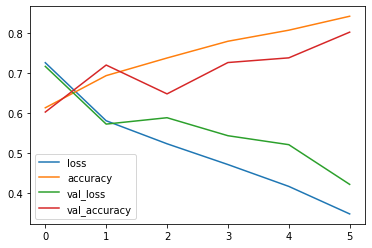

In [164]:
pd.DataFrame(history.history).plot()

In [165]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array


In [182]:
def load_test_image(path):
  image=cv2.imread(path)
  image.resize(64,64,3)
  image_arr=img_to_array(image)
  image_arr=image_arr/255
  np_image = np.expand_dims(image_arr, axis=0)
  return np_image

def pred_dog_cat(img):
  pred=model.predict(img)
  idx=np.argmax(pred)
  if(idx==1):
    print("cat")
  else:
    print("dog")
  



In [186]:
ls=[]
test_dir="/content/datset/testing/"

for i in range(1,13):
  path=test_dir+str(i)+".jpg"
  ls.append(load_test_image(path))


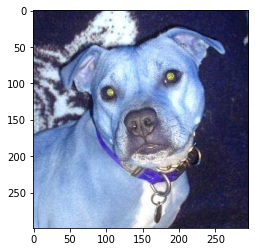

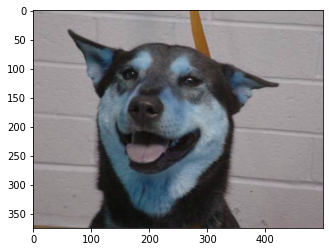

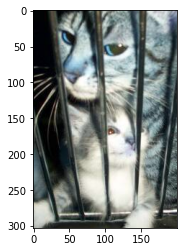

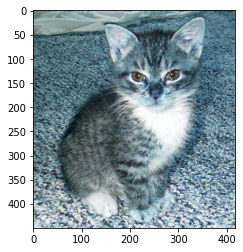

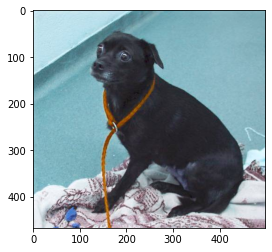

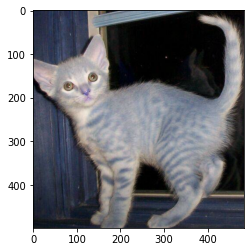

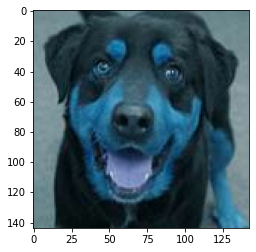

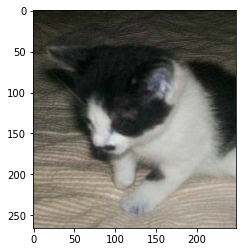

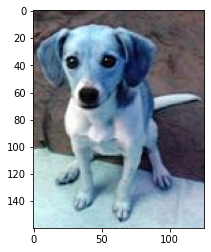

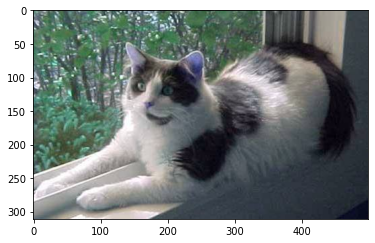

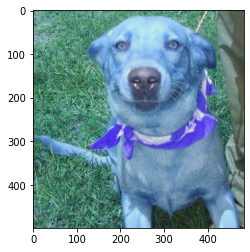

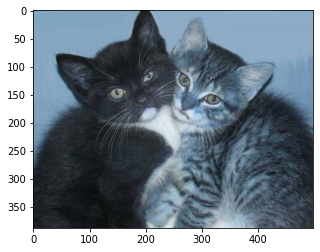

In [199]:
import matplotlib.pyplot as plt
for i in range(1,13):
  path=test_dir+str(i)+".jpg"
  image=cv2.imread(path)
  plt.imshow(image)
  plt.show()

In [200]:
for i in range(0,12):
  pred_dog_cat(ls[i])

dog
dog
cat
cat
dog
cat
dog
dog
dog
cat
cat
dog
